# Covariance

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.spatial as sp

import matrices.loading as mload

In [3]:
plt.rcParams["figure.figsize"] = (18,18)
mpl.rcParams['image.cmap'] = 'jet'

Dataset (629814 documents)

This is the path to th dataset.

In [4]:
data_path = "resources/aminer/v1" # 629814 documents

Load sparse matrix with jaccard similarities.

In [5]:
matrix_jaccard = mload.load_matrix_jaccard_sim(data_path) # 998 documents sample
print(matrix_jaccard.ndim, matrix_jaccard.shape)

Loading saved matrix ...
2 (998, 998)


Load sparse matrix with word2vec similarities.

In [6]:
matrix_word2vec = mload.load_matrix_word2vec_sim(data_path) # 998 documents sample
print(matrix_word2vec.ndim, matrix_word2vec.shape)

Loading saved matrix ...
2 (998, 998)


In [7]:
N = matrix_jaccard.shape[0]
print("Number of documents", N, (matrix_jaccard.shape))

Number of documents 998 (998, 998)


Dice

In [8]:
matrix_dice = 2*matrix_jaccard/(1 + matrix_jaccard)
print(matrix_dice.shape)

(998, 998)


Jaccard disimilarity

In [9]:
matrix_jaccard_dis = 1 - matrix_jaccard
print(matrix_jaccard_dis.shape)

(998, 998)


In [10]:
# Means of jaccard similarities
jaccard_similarity_mean = np.divide(np.sum(matrix_jaccard, axis=1), N)
# Array of indices to sort matrices  
jaccard_ordered_indices = jaccard_similarity_mean.argsort()[::-1]

In [11]:
# Means of word2vec similarities
word2vec_similarity_mean = np.divide(np.sum(matrix_word2vec, axis=1), N)
# Array of indices to sort matrices  
word2vec_ordered_indices = word2vec_similarity_mean.argsort()[::-1]

In [12]:
# Means of dice similarities
dice_similarity_mean = np.divide(np.sum(matrix_dice, axis=1), N)
# Array of indices to sort matrices  
dice_ordered_indices = dice_similarity_mean.argsort()[::-1]

## Covariance 

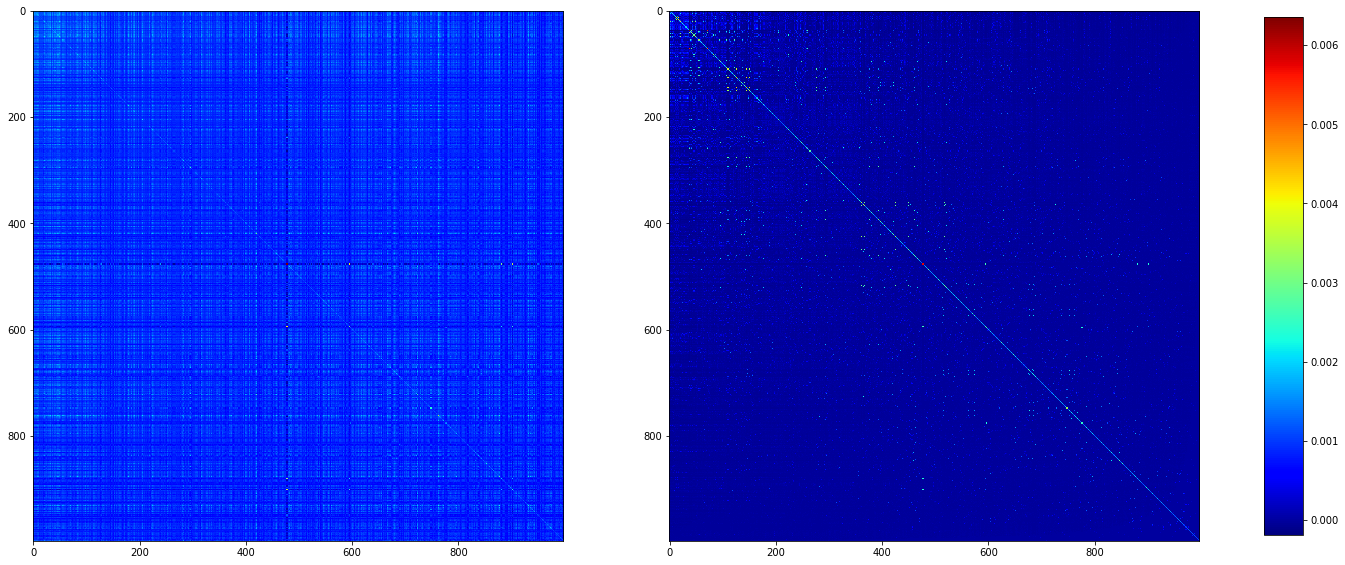

In [13]:
plt.subplot(121)
plt.imshow(np.cov(matrix_word2vec[:,jaccard_ordered_indices][jaccard_ordered_indices,:]))
plt.subplot(122)
plt.imshow(np.cov(matrix_jaccard[:,jaccard_ordered_indices][jaccard_ordered_indices,:]))

plt.subplots_adjust(left=0.,  right=0.90, bottom=0.0, top=1.0)
cax = plt.axes([0.95, 0.3, 0.03, 0.4]) #[left, bottom, width, height] 
plt.colorbar(cax=cax)
plt.show()